## Aluno: Epitácio Pessoa de Brito Neto

## Matrícula: 11506856

## Professora: Ana Wyse

# Prova 3 - Sistemas e Controle de Automação

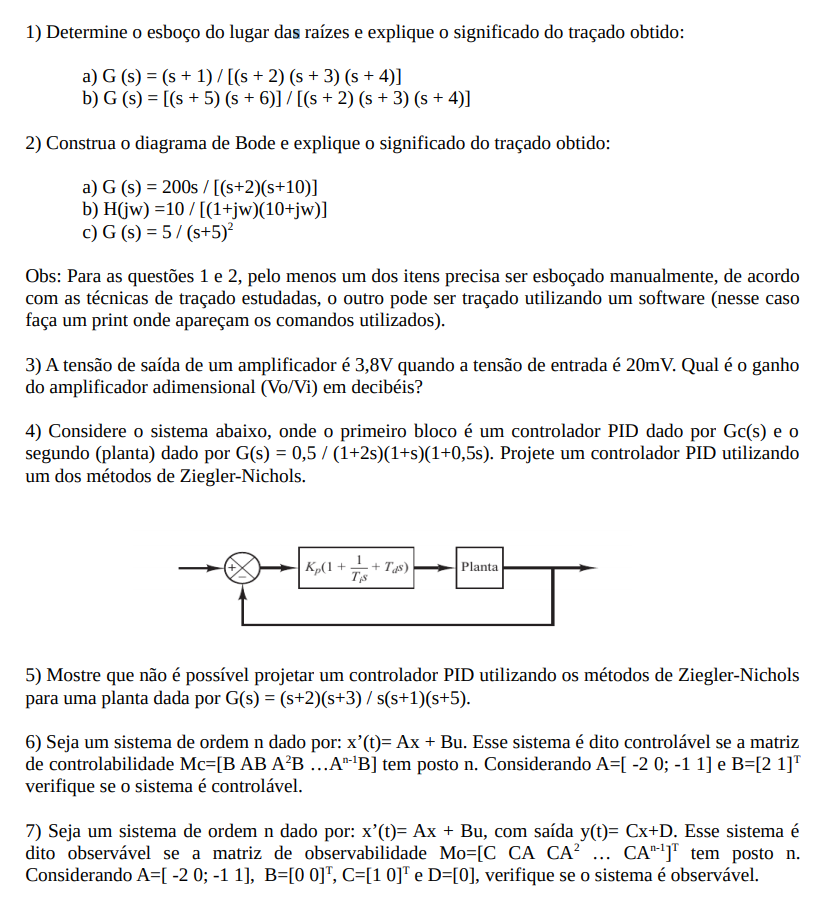

### Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sps
import numpy as np
import control.matlab as ml

# 1. a)

In [2]:
num = np.array([1,1])
den = np.polymul(np.polymul(np.array([1,2]), np.array([1,3])), np.array([1,4]))

G = ml.tf(num,den)
G

TransferFunction(array([1, 1]), array([ 1,  9, 26, 24]))

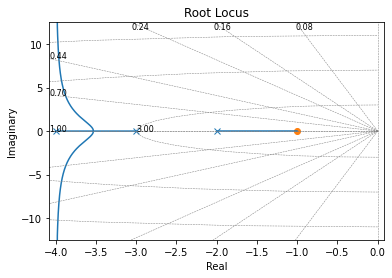

In [3]:
rlist, klist = ml.rlocus(G, grid=True)
plt.show()

Como o número das assíntotas é definido pelo $N_{polos} - N_{zeros}$, neste exemplo, possuímos 2 assíntotas. Pelas regras de desenho do LGR, notamos que a função de transferência não possui polos ou zeros complexos, que pode ser observado pelo traçado destes em cima do eixo real e jamais cruzando o eixo imaginário. Ainda com relação à regra de desenho, ao demarcar os pontos com um x, é aplicada a regra em que, o traçado só pertence ao LGR se o número desses x for ímpar, desta forma, temos a situação acima, que entre -3 e -2 não pertence, devido ao número par à direita do ponto (-3,0). 

# b)

In [4]:
num = np.polymul(np.array([1,5]), np.array([1,6]))
den = np.polymul(np.polymul(np.array([1,2]), np.array([1,3])), np.array([1,4]))

G = ml.tf(num,den)
G

TransferFunction(array([ 1, 11, 30]), array([ 1,  9, 26, 24]))

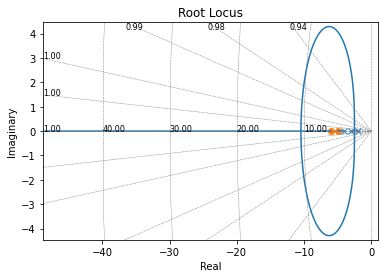

In [5]:
rlist, klist = ml.rlocus(G, grid=True)
plt.show()

Podemos perceber que a trajetória que pertence totalmente ao eixo real se refere a uma das assíntotas e seu devido ângulo, bem como conseguimos enxergar que,o valor aproximado entre [-2,-1] possui trajetórias positivas e negativas pelo eixo imaginário, onde ambos se encontram no ponto (-10,0), ponto de chegada desta trajetória. Pode-se perceber o respeito das regras de traçado do LGR, por exemplo, demarcadas por x e o número de assíntotas, calculada por $N_{polos} - N_{zeros} = 1$ também é respeitada, como foi dito sobre a trajetória, anteriormente.

# 2. a)

$$G(s) = \frac{200s}{(s+2)(s+10)}$$

$G(j\omega) = 200j\omega*\frac{1}{j\omega + 2}*\frac{1}{j\omega + 10}$

$G(j\omega) = 200j\omega*\frac{1}{2(\frac{j\omega}{2}+1)}*\frac{1}{10(\frac{j\omega}{10}+1)}$

$G(j\omega) = 200*\frac{1}{2}*\frac{1}{10}*j\omega*\frac{1}{\frac{j\omega}{2}+1}*\frac{1}{\frac{j\omega}{10}+1}$

$G(j\omega) = 10*j\omega*\frac{1}{\frac{j\omega}{2}+1}*\frac{1}{\frac{j\omega}{10}+1}$

Para cada uma das frações na função $G(j\omega)$, respectivamente, teremos diagramas correspondentes no esboço que virá em seguida, bem como o diagrama de Bode resultante que representa o comportamento total. Antes disso, dada a equação seguinte:

$$W_c = \frac{1}{T}$$

Temos:

$W_{C1} = 2$ e $W_{C2} = 10$

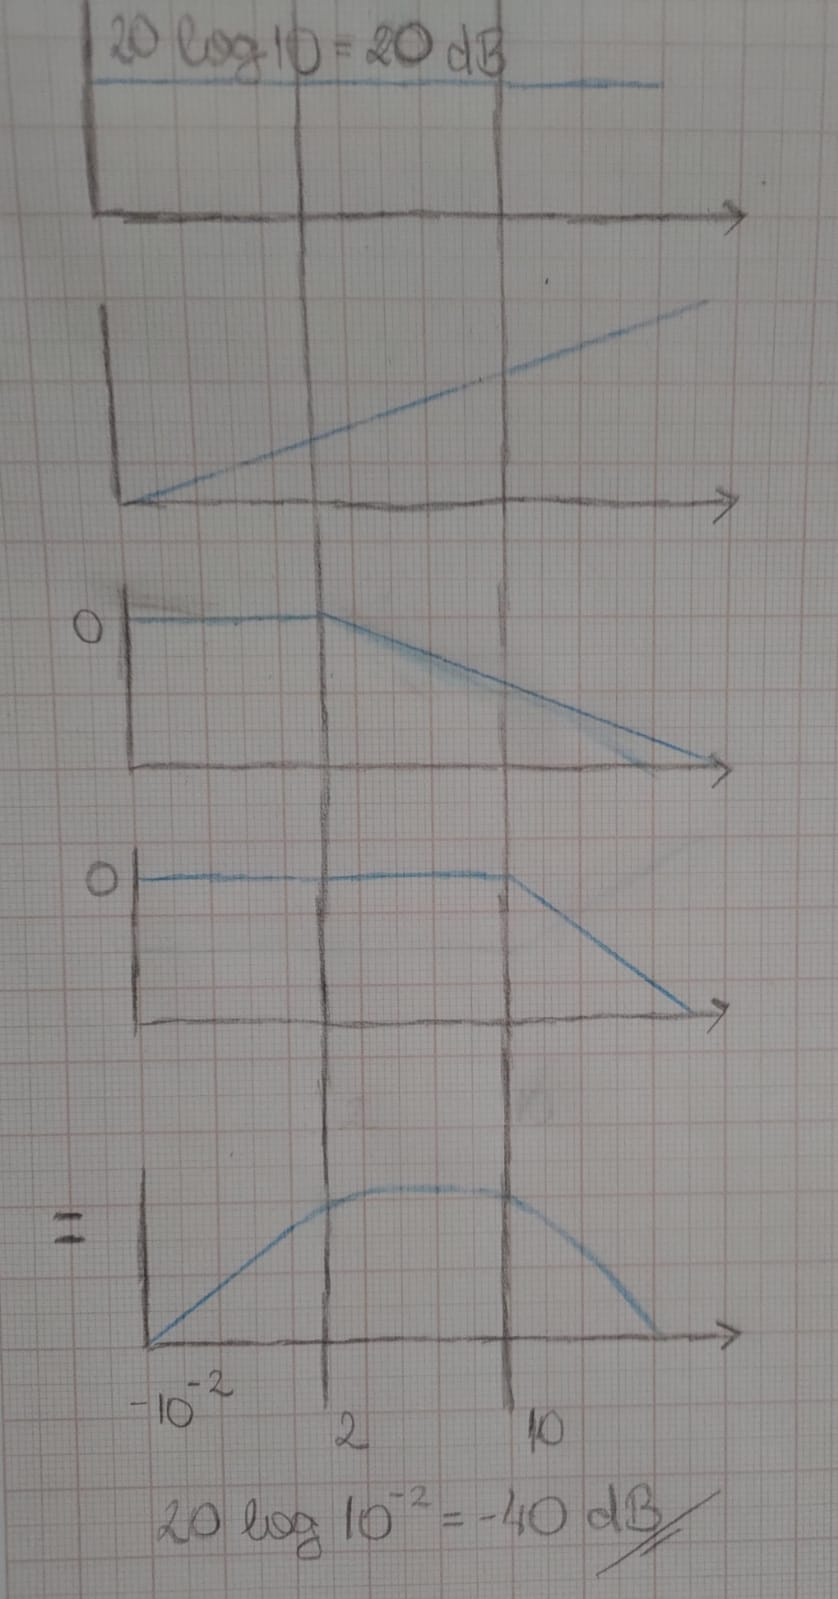

Como os dois últimos gráficos (com excessão do gráfico resultante) estão atuando em zero até o ponto 2, o único comportamento que influenciará o gráfico resultante será o segundo gráfico, subindo, até o 2, 20db/década. Após isto, na frequência de corte, entre [2,10], o segundo e terceiro gráfico atuam neste intervalo, um crescendo e outro descrescendo, portanto, existe esse comportamento estacionário, já que ambos estão se anulando com o valor de 20db/década. Por fim, quando saímos da segunda frequência de corte, temos as mesmas influências atuando na situação anterior, no entanto, devemos considerar a descida de 20db/década do quarto gráfico. Já que o segundo e terceiro gráfico se anulam, sobra apenas a influência do quarto gráfico com uma descida de 20db/década, gerando então, a representação do gráfico resultante.

## Solução por software

In [6]:
num = np.array([200,0])
den = np.polymul(np.array([1,2]), np.array([1,10]))

G = ml.tf(num,den)
G

TransferFunction(array([200,   0]), array([ 1, 12, 20]))

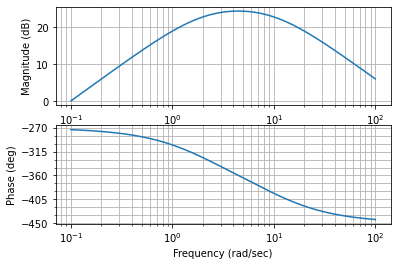

In [7]:
mag, phase, w = ml.bode(G)
plt.show()

# b)

In [8]:
num1 = 10
den1 = np.polymul(np.array([1,1]), np.array([1,10]))

G1 = ml.tf(num1,den1)
G1

TransferFunction(array([10]), array([ 1, 11, 10]))

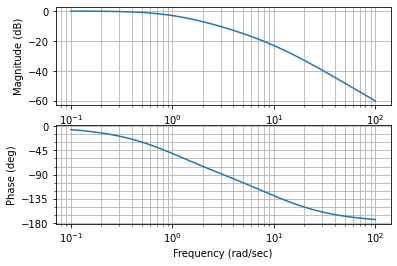

In [9]:
mag1, phase1, w1 = ml.bode(G1)
plt.show()

Para este caso, temos $W_{C1} = 1$ e $W_{C2} = 10$, no entanto, a função de transferência não possui influência do $j\omega$ no numerador, portanto, temos apenas uma constante = 1. Por isto, o início do gráfico se mantém em zero até a primeira frequência de corte, onde sofre a primeira influência, decaindo. Ao chegar na segunda frequência de corte, portanto, temos influência de dois comportamentos que com mesmo sentido, portanto, o processo de queda da magnitude é intensificada, no fim.

# c)

In [10]:
num2 = 5
den2 = np.polymul(np.array([1,5]), np.array([1,5]))

G2 = ml.tf(num2,den2)
G2

TransferFunction(array([5]), array([ 1, 10, 25]))

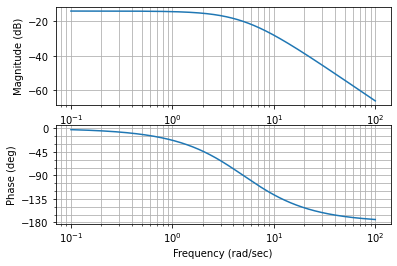

In [11]:
mag2, phase2, w2 = ml.bode(G2)
plt.show()

Para este, temos $W_{C1} = W_{C2} = 5$, portanto, temos uma única frequência de corte, bem como não possui um termo dependente de $j\omega$ no denominador. Portanto, até chegar na primeira (e única) frequência de corte, o diagrama possui o comportamento estável e sem alterações de magnitude até que, ao chegar na frequência de corte, possui a influência de dois comportamentos de mesma intensidade e sentido, portanto, decai de forma mais intensa logo em seguida.

# 3.

$K = \frac{3.8}{20*10^{-3}} = 190 ⟶ K = 20log190 =$ **45.6dB**

# 4.

In [12]:
num3 = 0.5
den3 = np.polymul(np.polymul(np.array([1,2]), np.array([1,1])), np.array([1,0.5]))
G3 = ml.tf(num3,den3)
G3

TransferFunction(array([0.5]), array([1. , 3.5, 3.5, 1. ]))

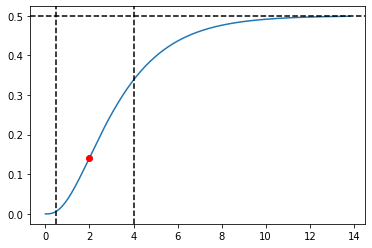

In [13]:
yout, T = ml.step(G3)

# Encontrando o ponto de inflexão
dy = np.diff(yout) # Primera derivada
idx_max_dy = np.argmax(dy)

plt.plot(T, yout)
plt.plot(T[idx_max_dy], yout[idx_max_dy], 'or', label='estimated inflection point')
plt.axvline(x=0.5, color='k', linestyle='--')
plt.axvline(x=4, color='k', linestyle='--')
plt.axhline(y=0.5, color='k', linestyle='--')
plt.show()

$$Tabela$$

| | | $K_p$ | $T_i$ | $T_d$ |
| --- || --- | --- | --- |
| $PID$ | | $1.2\frac{T}{L}$ | $\frac{0.5}{L}$ | $0.5L$ |

$$Resultados$$

Sejam $T = 3.5$, $K = 0.5$ e $L = 0.5$, temos:

| | | $K_p$ | $T_i$ | $T_d$ |
| --- || --- | --- | --- |
| $PID$ | | $8.4$ | $1$ | $0.25$ |

$$PID = K_p(1+\frac{1}{T_is}+T_ds) = K_p + \frac{K_i}{s} + K_ds$$


Substituindo os valores da tabela na equação, temos $K_p = 8.4$, $K_i = 8.4$ e $ K_d = 2.1$, portanto:

$$PID = 8.4 + \frac{8.4}{s} + 2.1s$$

$$ PID = \frac{8.4s^2 + 8.4s + 2.1}{s}$$ 

# 5.

In [14]:
num4 = np.polymul(np.array([1,2]), np.array([1,3]))
den4 = np.polymul(np.polymul(np.array([1,1]), np.array([1,0])), np.array([1,5]))
G4 = ml.tf(num4,den4)
G4

TransferFunction(array([1, 5, 6]), array([1, 6, 5, 0]))

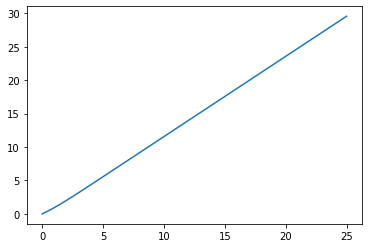

In [15]:
yout1, T1 = ml.step(G4)
plt.plot(T1, yout1)
plt.show()

Para aplicar o método de Ziegler-Nichols, após o degrau, a curva resultante deve ter o comportamento de uma sigmoide, ou seja, uma curva que se assemelha à letra S. Isso se deve a uma característica de equações de comportamento sigmoidal que é a representação da função de transferência em um modelo de primeira ordem com atraso, necessária para aplicação do método. Como podemos ver, o comportamento da curva resultante da nossa função não corresponde com as características necessárias, portanto, não podemos utilizar o método Ziegler-Nichols, neste caso.

# 6.

$$AB = \begin{bmatrix} -2 & 0 \\ -1 & 1 \end{bmatrix} * \begin{bmatrix} 2 \\ 1 \end{bmatrix} = \begin{bmatrix} -4 \\ -1 \end{bmatrix}$$

$$M_c = \begin{bmatrix} B & AB \end{bmatrix} = \begin{bmatrix} 2 & -4 \\ 1 & -1\end{bmatrix} $$

$Posto(M_c) = 2 ⟶$ **É controlável.**

# 7.

Supus que $C = \begin{bmatrix} 1 & 0 \end{bmatrix}^T$ fosse, no caso, a não transposta de forma que fosse possível avaliar a observabilidade já que, com a transposta, o cálculo de $CA$ não seria possível dada as dimensões das matrizes durante para a operação de multiplicação.

$$CA = \begin{bmatrix} 1 & 0 \end{bmatrix} * \begin{bmatrix} -2 & 0 \\ -1 & 1 \end{bmatrix} = \begin{bmatrix} -2 & 0 \end{bmatrix}$$

$$M_o = \begin{bmatrix} C \\ CA \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ -2 & 0 \end{bmatrix} $$

$Posto(M_o) = 1 ⟶$ **Não é observável.**